In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
g=9.8
theta0=np.radians(10)
l=1
x0=np.array([theta0,0])  # theta, omega
w=np.sqrt(g/l)
dt=0.1
n=1000

In [3]:
t=np.linspace(0,10,n)
y=theta0*np.cos(w*t)

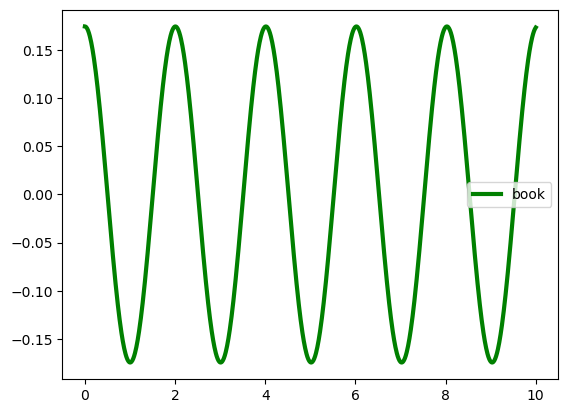

In [4]:
plt.plot(t,y,'g-',lw=3,label='book')
plt.legend()

In [5]:
def f(t,x):   # find the derivative
    theta,omega=x
    return np.array([omega,-g/l*theta])

def rk1(t,x,f,dt):
    k1=f(t,x)*dt
    return k1

In [6]:
x=x0.copy()
X_1=np.zeros((int(n/3),len(x0)))
for i in range(int(n/3)):
    X_1[i]=x.copy()
    x=x+rk1(0,x,f,dt*0.33)

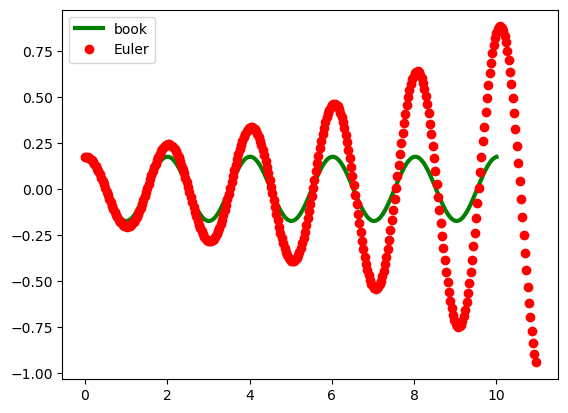

In [7]:
t_test=np.arange(int(n/3))*0.33*dt

plt.plot(t,y,'g-',lw=3,label='book')
plt.plot(t_test,X_1[:,0],'ro',lw=3,label='Euler')
plt.legend()

In [8]:
# in the instance. the direct Euler's method
# introduce a strong artifact to the system
# which increases the system's total energy,
# Theoretically, if we continue to reduce dt,
# the model will be close to the true values.
# but it will increase the computing power, hense waste energy. 

In [9]:
def rk2(t,x,f,dt):
    k1=f(t,x)*dt
    k2=f(t+dt/2,x+k1/2)*dt  #half time pace, half step pace
    return k2
    
    

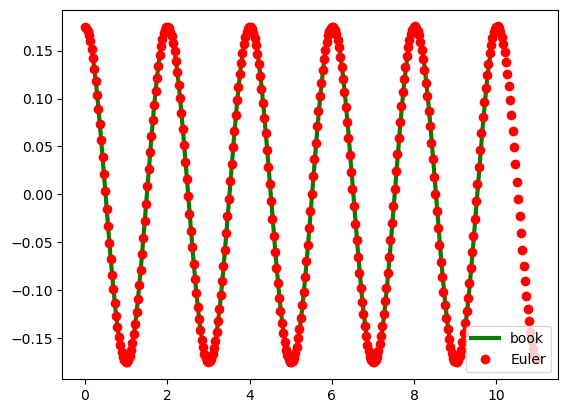

In [11]:
x=x0.copy()
X_2=np.zeros((int(n/3),len(x0)))
for i in range(int(n/3)):
    X_2[i]=x.copy()
    x=x+rk2(0,x,f,dt*0.33)

t_test=np.arange(int(n/3))*0.33*dt

plt.plot(t,y,'g-',lw=3,label='book')
plt.plot(t_test,X_2[:,0],'ro',lw=3,label='Euler')
plt.legend()

In [ ]:
# RK2 can achieve 2nd order accuracy. 
# the projectile problem happens to be a 2nd order system
# So, RK2 can produce an accurate answer to this problem. 

In [ ]:
import scipy as sp


In [13]:
def rk4(t,x,f,dt):
    k1=f(t,x)*dt
    k2=f(t+dt/2,x+k1/2)*dt  # half time, half step
    k3=f(t+dt/2,x+k2/2)*dt  # half time, half step
    k4=f(t+dt,x+k3)*dt      # one time, one step
    k=(k1+2*k2+2*k3+k4)/6
    return k
    

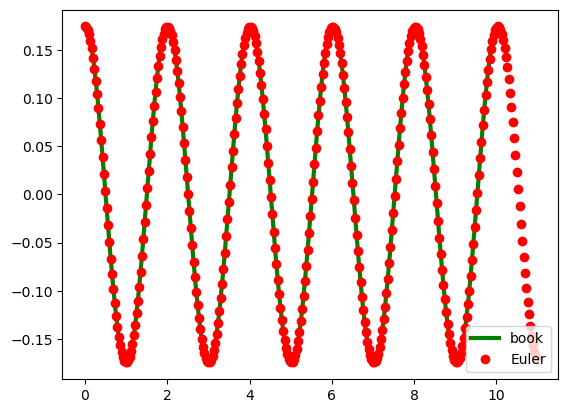

In [14]:
x=x0.copy()
X_4=np.zeros((int(n/3),len(x0)))
for i in range(int(n/3)):
    X_4[i]=x.copy()
    x=x+rk4(0,x,f,dt*0.33)

t_test=np.arange(int(n/3))*0.33*dt

plt.plot(t,y,'g-',lw=3,label='book')
plt.plot(t_test,X_4[:,0],'ro',lw=3,label='Euler')
plt.legend()